# Web Scraping and Simple EDA of 10K Race

Source: https://www.datacamp.com/community/tutorials/web-scraping-using-python

The dataset used in this tutorial was taken from a 10K race that took place in Hillsboro, OR on June 2017. Specifically, you will analyze the performance of the 10K runners. http://www.hubertiming.com/results/2017GPTR10K

Using Jupyter Notebook, you should start by importing the necessary modules (pandas, numpy, matplotlib.pyplot, seaborn). If you don't have Jupyter Notebook installed, I recommend installing it using the Anaconda Python distribution which is available on the internet. To easily display the plots, make sure to include the line %matplotlib inline as shown below.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

To perform web scraping, you should also import the libraries shown below. The urllib.request module is used to open URLs. The Beautiful Soup package is used to extract data from html files. The Beautiful Soup library's name is bs4 which stands for Beautiful Soup, version 4.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

After importing necessary modules, you should specify the URL containing the dataset and pass it to urlopen() to get the html of the page.

In [ ]:
url = 'http://www.hubertiming.com/results/2017GPTR10K'
html = urlopen(url)

Getting the html of the page is just the first step. Next step is to create a Beautiful Soup object from the html. This is done by passing the html to the BeautifulSoup() function. The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects. The second argument 'lxml' is the html parser whose details you do not need to worry about at this point.

In [ ]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

The soup object allows you to extract interesting information about the website you're scraping such as getting the title of the page as shown below.

In [ ]:
# Get the title
soup.title

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>

You can also get the text of the webpage and quickly print it out to check if it is what you expect.

In [ ]:
# Print out the text
text = soup.get_text()
print(soup.text)








Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!





















 2017 Intel Great Place to Run 10K \ Urban Clash Games
 Hillsboro Stadium, Hillsboro, OR 
 June 2nd, 2017


                            





 Email
                        timing@hubertiming.com with results questions. Please include your bib number if you have it.


                    






Huber Timing Home





10K:


Finishers:
577


Male:
414


Female:
163









 5K Individual
 5K Team
 10K Individual
 10K Team
 Summary




Indvidual Results



10K Results



Search:

Search
Division:

Men
Women
Non-Binary
Masters Men
Masters Women
Masters Non-Binary

F 18-25
F 26-35
F 36-45
F 46-55
F Under 18
M 18-25
M 26-35
M 36-45
M 46-55
M 55+
M Under 18
 Team:

Unattached
COLUMBIA TEAM A
COLUMBIA TEAM B
COLUMBIA TEAM C
COLUMBIA TEAM D
COLUMBIA TEAM E
DTNA1
DTNA2
DTNA3
FXG1
INTEL TEAM A
INTEL TEAM B
INTEL TEAM C
INTEL TEAM D
INTEL TEAM E
INTEL TEAM F
INTEL TEAM G
INTEL TEAM H
INTEL TEAM I


You can use the find_all() method of soup to extract useful html tags within a webpage. Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells. The code below shows how to extract all the hyperlinks within the webpage.

In [ ]:
soup.findAll('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

As you can see from the output above, html tags sometimes come with attributes such as class, src, etc. These attributes provide additional information about html elements. You can use a for loop and the get("href") method to extract and print out only hyperlinks.

In [ ]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


To print out table rows only, pass the 'tr' argument in soup.find_all().

In [ ]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

           

The goal of this tutorial is to take a table from a webpage and convert it into a dataframe for easier manipulation using Python. To get there, you should get all table rows in list form first and then convert that list into a dataframe. Below is a for loop that iterates through table rows and prints out the cells of the rows.

In [ ]:
for row in rows:
    row_td = row.find_all('td')
    print(row_td)
type(row_td)

[]
[<td>Finishers:</td>, <td>577</td>]
[<td>Male:</td>, <td>414</td>]
[<td>Female:</td>, <td>163</td>]
[]
[<td>1</td>, <td>814</td>, <td>

                    JARED WILSON

                </td>, <td>M</td>, <td>TIGARD</td>, <td>OR</td>, <td>36:21</td>, <td>36:24</td>, <td></td>]
[<td>2</td>, <td>573</td>, <td>

                    NATHAN A SUSTERSIC

                </td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>36:42</td>, <td>36:45</td>, <td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>]
[<td>3</td>, <td>687</td>, <td>

                    FRANCISCO MAYA

                </td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>37:44</td>, <td>37:48</td>, <td></td>]
[<td>4</td>, <td>623</td>, <td>

                    PAUL MORROW

                </td>, <td>M</td>, <td>BEAVERTON</td>, <td>OR</td>, <td>38:34</td>, <td>38:37</td>, <td>

bs4.element.ResultSet

The output above shows that each row is printed with html tags embedded in each row. This is not what you want. You can use remove the html tags using Beautiful Soup or regular expressions.

The easiest way to remove html tags is to use Beautiful Soup, and it takes just one line of code to do this. Pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.

In [ ]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


#### Alternative

Using regular expressions is highly discouraged since it requires several lines of code and one can easily make mistakes. It requires importing the re (for regular expressions) module. The code below shows how to build a regular expression that finds all the characters inside the < td > html tags and replace them with an empty string for each table row. First, you compile a regular expression by passing a string to match to re.compile(). The dot, star, and question mark (.*?) will match an opening angle bracket followed by anything and followed by a closing angle bracket. It matches text in a non-greedy fashion, that is, it matches the shortest possible string. If you omit the question mark, it will match all the text between the first opening angle bracket and the last closing angle bracket. After compiling a regular expression, you can use the re.sub() method to find all the substrings where the regular expression matches and replace them with an empty string. The full code below generates an empty list, extract text in between html tags for each row, and append it to the assigned list.

In [ ]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

In [ ]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


## Data Manipulation and Cleaning

The dataframe is not in the format we want. To clean it up, you should split the "0" column into multiple columns at the comma position. This is accomplished by using the str.split() method.

In [ ]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


This looks much better, but there is still work to do. The dataframe has unwanted square brackets surrounding each row. You can use the strip() method to remove the opening square bracket on column "0."

In [ ]:
df1[0] = df1[0].str.strip('[')
df1.head(20)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


Same as the last column, removing the closing bracket for cells in the "Team" column.

In [ ]:
df1[8] = df1[8].str.strip(']')
df1.head(20)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


Now, clean column 2 and 8 by striping out end-of-line characters like \r and \n using string replace

In [ ]:
df1[2] = df1[2].str.replace('\n', '')
df1[2] = df1[2].str.replace('\r', '')
df1[8] = df1[8].str.replace('\n', '')
df1[8] = df1[8].str.replace('\r', '')
df1.head(20)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...


The table is missing table headers. You can use the find_all() method to get the table headers.

In [ ]:
col_labels = soup.find_all('th')
col_labels

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Time</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

Similar to table rows, you can use Beautiful Soup to extract text in between html tags for table headers.

In [ ]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


You can then convert the list of headers into a pandas dataframe.

In [ ]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


Similarly, you can split column "0" into multiple columns at the comma position for all rows.

In [ ]:
df3 = df2[0].str.split(',', expand=True)
df3[0] = df3[0].str.strip()
df3.head()

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


Below shows how to assign the first row to be the table header.

In [ ]:
df4 = df1.rename(columns=df3.iloc[0])
df4.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None


At this point, the table is almost properly formatted. For analysis, you can start by getting an overview of the data as shown below.

In [ ]:
df4.info()
df4.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     582 non-null    object
 1    Bib       580 non-null    object
 2    Name      577 non-null    object
 3    Gender    577 non-null    object
 4    City      577 non-null    object
 5    State     577 non-null    object
 6    Time      577 non-null    object
 7    Gun Time  577 non-null    object
 8    Team]     577 non-null    object
dtypes: object(9)
memory usage: 41.0+ KB


(582, 9)

In [ ]:
df4.isnull().any(axis=1)

0       True
1       True
2       True
3       True
4       True
       ...  
577    False
578    False
579    False
580    False
581    False
Length: 582, dtype: bool

The table has 582 rows and 9 columns. You can drop all rows with any missing values.

In [ ]:
df5 = df4.dropna(axis=0, how='any')
print(df5.shape)
df5.head(20)

(577, 9)


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...
10,6,642,JONATHON TRAN ...,M,PORTLAND,OR,39:49,39:55,
11,7,144,GEORGE TOTONCHY ...,M,PORTLAND,OR,40:04,40:17,
12,8,395,BENJAMIN C CHAFFIN ...,M,PORTLAND,OR,40:05,40:09,
13,9,7,BRANDON THOMAS ...,M,,,40:17,40:24,COLUMBIA TEAM B ...
14,10,3,ERIK BJORNSTAD ...,M,,,40:21,40:25,COLUMBIA TEAM A ...


You can perform more data cleaning by renaming the '[Place' and ' Team]' columns. Python is very picky about space. Make sure you include space after the quotation mark in ' Team]'.

In [ ]:
df5.rename(columns={'[Place': 'Place'},inplace=True)
df5.rename(columns={' Team]': 'Team'},inplace=True)
df5.head()

<ipython-input-26-1d3788ebae73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns={'[Place': 'Place'},inplace=True)
<ipython-input-26-1d3788ebae73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns={' Team]': 'Team'},inplace=True)


,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...


There are still unforeseen spaces around the column names, we have to remove them.

In [ ]:
df5.columns = df5.columns.str.replace(' ', '')

It took a while to get here, but at this point, the dataframe is in the desired format. Now you can move on to the exciting part and start plotting the data and computing interesting statistics.

## Data Analysis and Visualization

### Average finish time (in minutes)

The first question to answer is, what was the average finish time (in minutes) for the runners? You need to convert the column "Time" , which is Chip Time into just minutes. One way to do this is to convert the column to a list first for manipulation.

In [ ]:
time_list = df5['Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    if (len(i.split(':'))>2):
        h, m, s = i.split(':')
    else:
        m,s = i.split(':')
        h = 0
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

The next step is to convert the list back into a dataframe and make a new column ("Runner_mins") for runner chip times expressed in just minutes.

In [ ]:
df5['Runner_mins'] = time_mins
df5.head()

<ipython-input-29-3ffaeab40720>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Runner_mins'] = time_mins


,Place,Bib,Name,Gender,City,State,Time,GunTime,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC ...,M,PORTLAND,OR,36:42,36:45,INTEL TEAM F ...,36.700000
7,3,687,FRANCISCO MAYA ...,M,PORTLAND,OR,37:44,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,38:37,,38.566667
9,5,569,DEREK G OSBORNE ...,M,HILLSBORO,OR,39:21,39:24,INTEL TEAM F ...,39.350000


The code below shows how to calculate statistics for numeric columns only in the dataframe.

In [ ]:
df5.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


Interestingly, the average chip time for all runners was ~60 mins. The fastest 10K runner finished in 36.35 mins, and the slowest runner finished in 101.30 minutes.

A boxplot is another useful tool to visualize summary statistics (maximum, minimum, medium, first quartile, third quartile, including outliers). Below are data summary statistics for the runners shown in a boxplot. For data visualization, it is convenient to first import parameters from the pylab module that comes with matplotlib and set the same size for all figures to avoid doing it for each figure.

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x7f6af8592e60>], [Text(1, 0, 'Runners')])

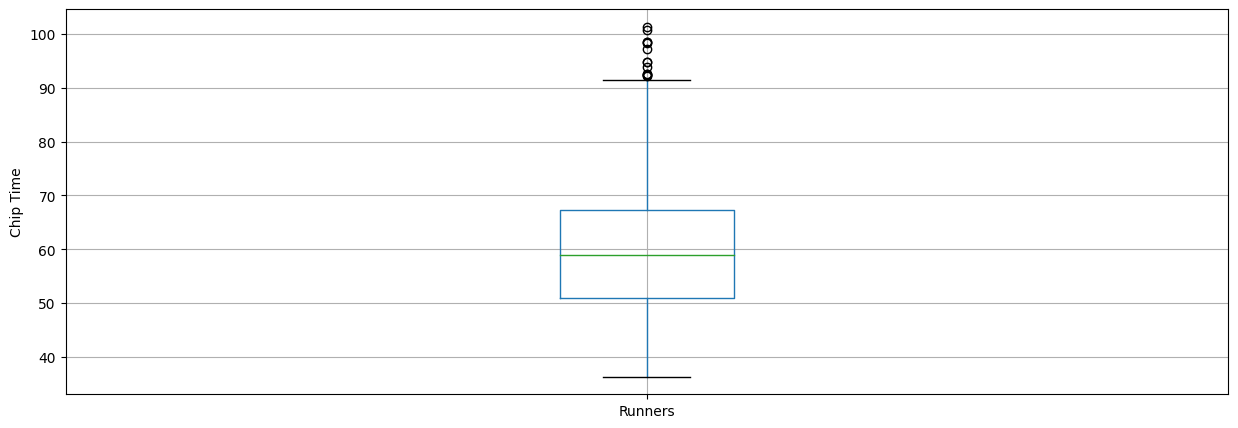

In [ ]:
df5.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

### Did the runners' finish times follow a normal distribution?

The second question to answer is: Did the runners' finish times follow a normal distribution?

Below is a distribution plot of runners' chip times plotted using the seaborn library. The distribution looks almost normal.

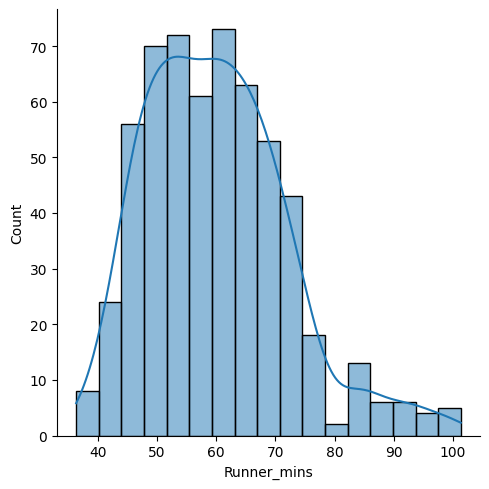

In [ ]:
x = df5['Runner_mins']
ax = sns.displot(x, kde=True, rug=False)
plt.show()

### Any difference between males and females?

The third question deals with whether there were any performance differences between males and females of various age groups. Below is a distribution plot of chip times for males and females.

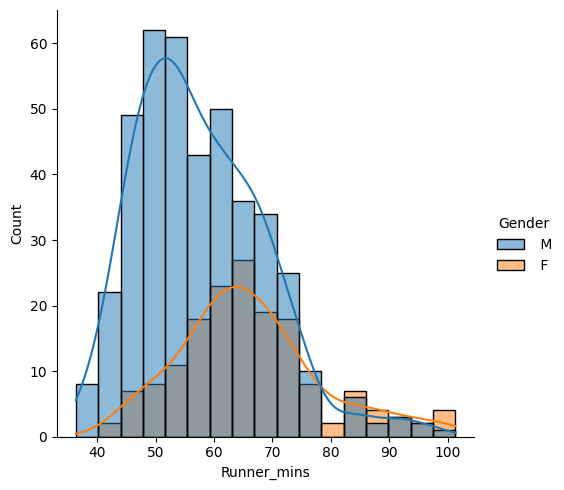

In [ ]:
sns.displot(df5, kde=True, x='Runner_mins', hue='Gender')

The distribution indicates that females were slower than males on average. You can use the groupby() method to compute summary statistics for males and females separately as shown below.

In [ ]:
g_stats = df5.groupby("Gender", as_index=True).describe()
print(g_stats)

       Runner_mins                                                         \
             count       mean        std        min        25%        50%   
Gender                                                                      
 F           163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M           414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                               
              75%         max  
Gender                         
 F      72.058333  101.300000  
 M      64.804167   98.516667  


The average chip time for all females and males was ~66 mins and ~58 mins, respectively. Below is a side-by-side boxplot comparison of male and female finish times.

Text(0.5, 0.98, '')

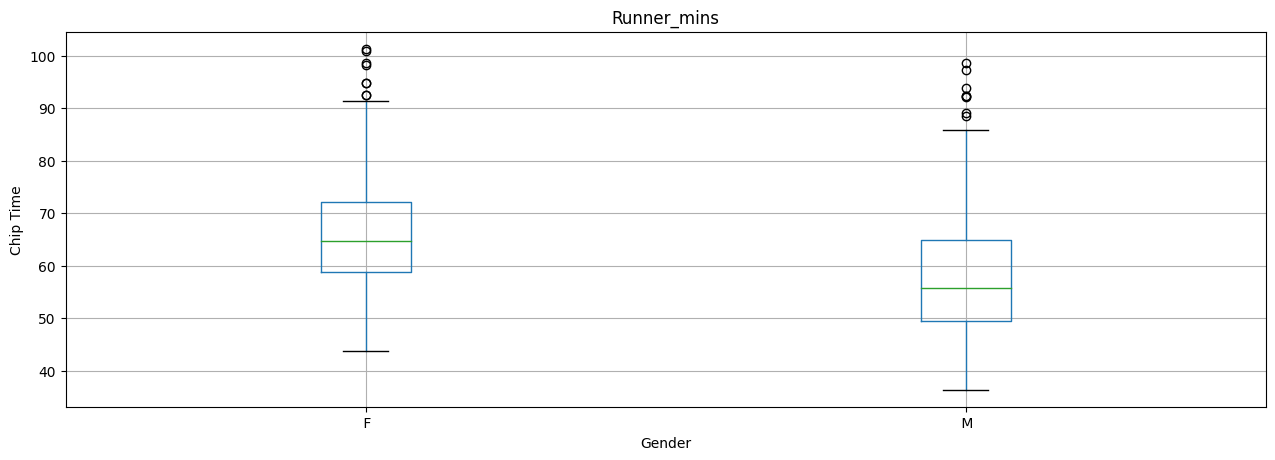

In [ ]:
df5.boxplot(column='Runner_mins', by='Gender')
plt.ylabel('Chip Time')
plt.suptitle("")